# Lista de Exercício 4
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste em 4 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`


### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage.transform import hough_circle, hough_circle_peaks

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [3]:
import urllib.request


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/wirebond_mask.tif", "wirebond_mask.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/house.tif", "house.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora.tif", "abobora.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku.tif", "sudoku.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/cores.jpeg", "cores.jpeg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



## 1) Detector de bordas

#### 1.1) Prewitt e Sobel (Nota 1.5/10)

1. Aplicar os detectores de bordas **verticais e horizontais** de Prewitt na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Aplicar os detectores de bordas **verticais e horizontais** de Sobel na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Comente os resultados encontrados.

**Dicas:**

* Nós criamos uma lista contendo os *kernels* de cada método. Note que vários *kernels* foram fornecidos abaixo. Alguns serão utilizados no próximo exercício também.
* Você pode criar um laço de repetição para pegar cada kernel da lista. Segue abaixo um exemplo de um `for loop` em uma lista.

``` python
kernel_lista = [kernel1,kernel2,kernel3]
for kernel in kernel_lista:
  print(kernel)

```

In [5]:
# Prewitt
p1 = np.array(((-1,-1,-1),
               ( 0, 0, 0),
               ( 1, 1, 1)))

p2 = np.array(((-1, 0, 1),
               (-1, 0, 1),
               (-1, 0, 1)))

# Lista com todos os kernels (Prewitt)
prewitt = [p1,p2]

# Sobel
s1 = np.array(((-1,-2,-1),
               ( 0, 0, 0),
               ( 1, 2, 1)))

s2 = np.array(((-1, 0, 1),
               (-2, 0, 2),
               (-1, 0, 1)))

s3 = np.array(((-2,-1, 0),
               (-1, 0, 1),
               ( 0, 1, 2)))

s4 = np.array((( 0, 1, 2),
               (-1, 0, 1),
               (-2,-1, 0)))

s5 = np.array((( 2, 1, 0),
               ( 1, 0,-1),
               ( 0,-1,-2)))

s6 = np.array((( 0,-1,-2),
               ( 1, 0,-1),
               ( 2, 1, 0)))

# Lista com todos os kernels (Sobel)
sobel = [s1,s2,s3,s4,s5,s6]

# Laplaciano
laplaciano = np.array(((-1,-1,-1),
                       (-1, 8,-1),
                       (-1,-1,-1)))

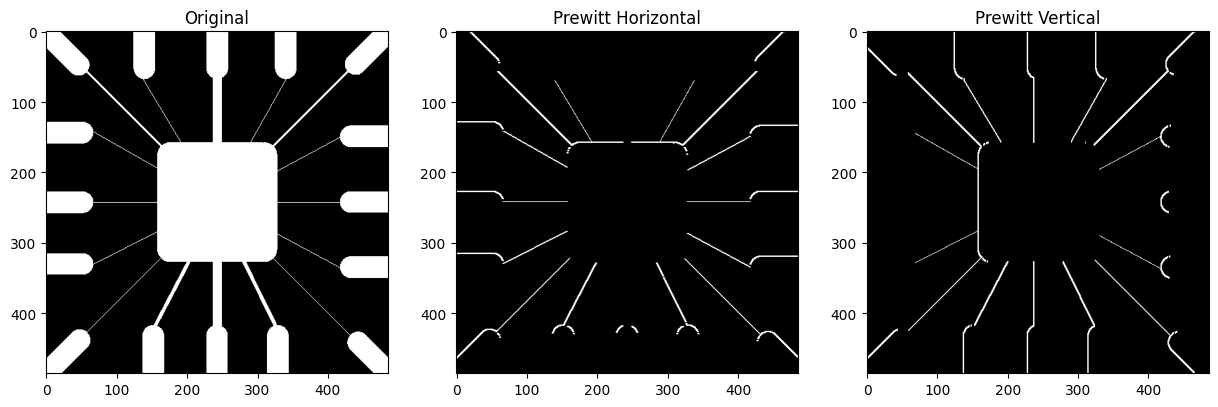

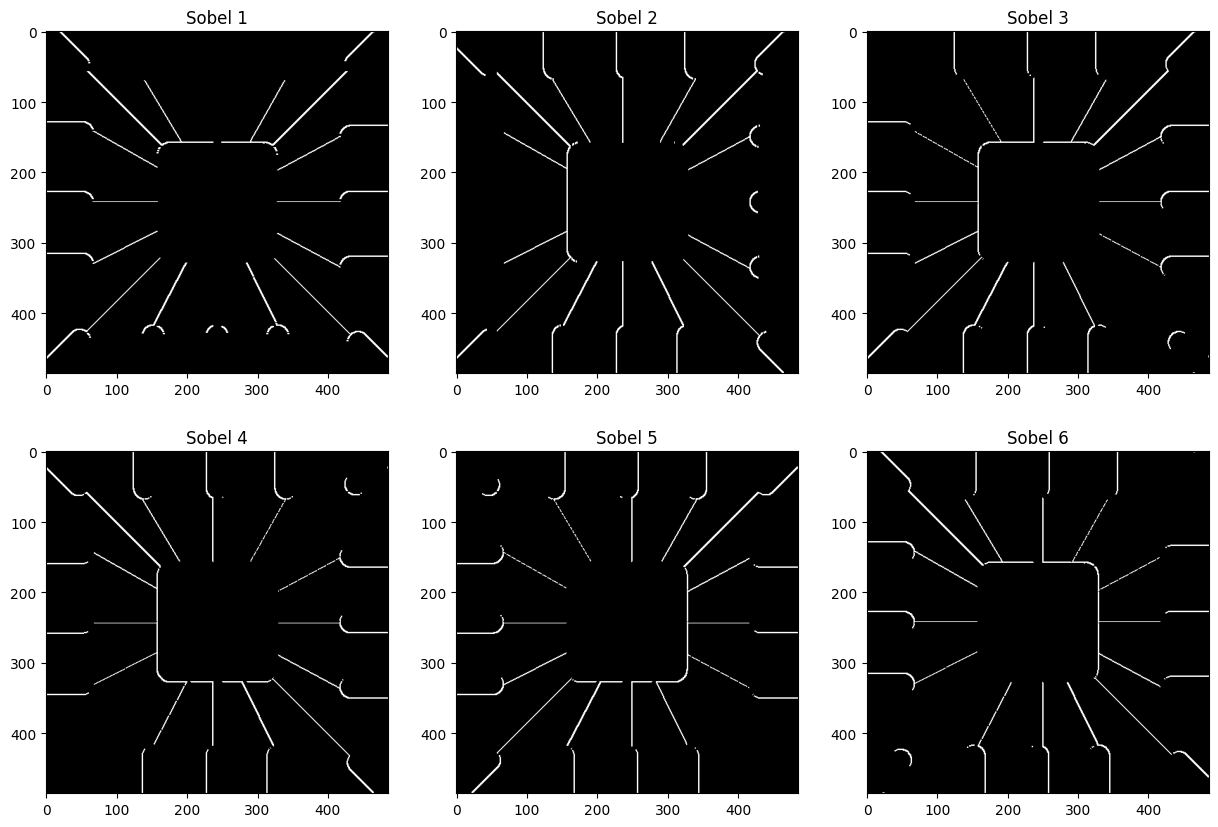

In [14]:
## -- Seu código começa AQUI -- ##
# Carregando a imagem
img1 = cv.imread('wirebond_mask.tif', cv.IMREAD_UNCHANGED)

img1_p = []
# Aplicação dos kernels prewitt
for k_p in prewitt:
    img1_p.append(cv.filter2D(src=img1, kernel=k_p, ddepth=-1))

# Mostrando o resultado da filtragem com os kernels Prewitt
plt.figure(figsize = (15,30))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img1, cmap='gray')

plt.subplot(1,3,2)
plt.title('Prewitt Horizontal')
plt.imshow(img1_p[0], cmap='gray')

plt.subplot(1,3,3)
plt.title('Prewitt Vertical')
plt.imshow(img1_p[1], cmap='gray')
plt.show()

img1_s = []
# Aplicação dos kernels sobel
for k_s in sobel:
    img1_s.append(cv.filter2D(src=img1, kernel=k_s, ddepth=-1))

# Mostrando o resultado da filtragem com os kernels Sobel
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
plt.title('Sobel 1')
plt.imshow(img1_s[0], cmap='gray')

plt.subplot(2,3,2)
plt.title('Sobel 2')
plt.imshow(img1_s[1], cmap='gray')

plt.subplot(2,3,3)
plt.title('Sobel 3')
plt.imshow(img1_s[2], cmap='gray')

plt.subplot(2,3,4)
plt.title('Sobel 4')
plt.imshow(img1_s[3], cmap='gray')

plt.subplot(2,3,5)
plt.title('Sobel 5')
plt.imshow(img1_s[4], cmap='gray')

plt.subplot(2,3,6)
plt.title('Sobel 6')
plt.imshow(img1_s[5], cmap='gray')
plt.show()
## -- Seu código termina AQUI -- ##



<h3>Comentário
<h5>
Percebe-se que todos os kernels conseguiram identificar as bordas existentes na figura. Os kernels Prewitt são muito parecidos com os dois primeiros kernels Sobel, com pequenas diferenças de expessura da borda identificada. Os filtros Sobel podem, também, identificar as bordas diagonais que exitem na imagem.

#### 1.2) Sobel e Laplaciano (Nota 1.5/10)

1. Leia a imagem ```house.tif```. Mostre a imagem na tela.
2. Aplique todos os detectores de bordas de Sobel na imagem lida no item 1. Mostre as imagens resultantes em um subplot.
2. Para cada *kernel*, aplique um *threshold* no resultado do filtro a fim de tentar manter somente as bordas que aquele filtro foi desenvolvido para detectar. Nas dicas deixamos um valor sugerido.
3. Some o resultado obtido por cada *kernel* em uma variável chamada  ```sobel_sum ```.
3. Aplique o detector de bordas Laplaciano na imagem ```house.tif```. Mostre em um subplot a imagem original, a soma de todos os resultados de Sobel (```sobel_sum```) e o resultado do Laplaciano. Coloque título nas imagens. O que se pode concluir?

**Dicas:**

* O valor de *threshold* sugerido é 220. Observe que para cada kernel, deve-se encontrar um valor mais adequado.

*  Faça um ```for loop``` para aplicar os filtros de Sobel. Isso simplifica o código.

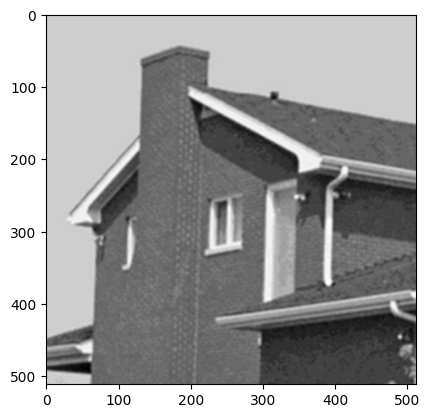

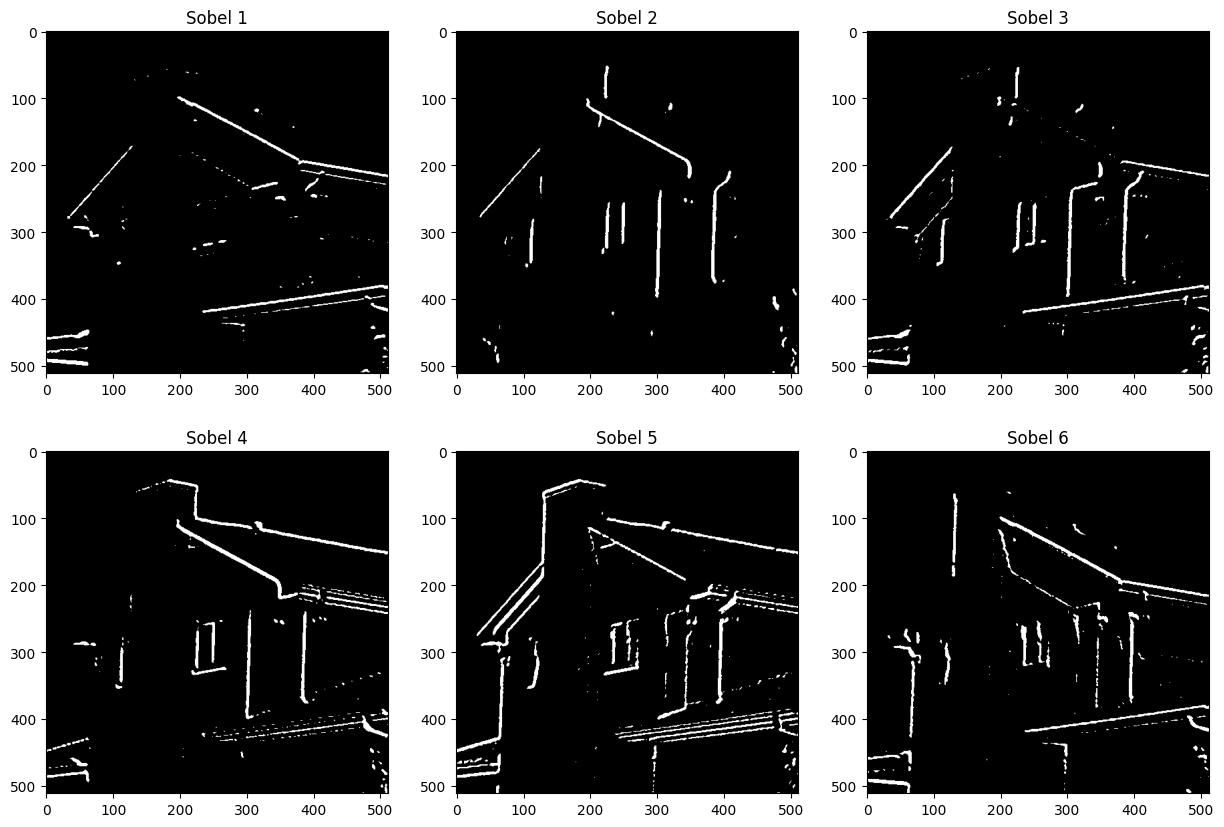

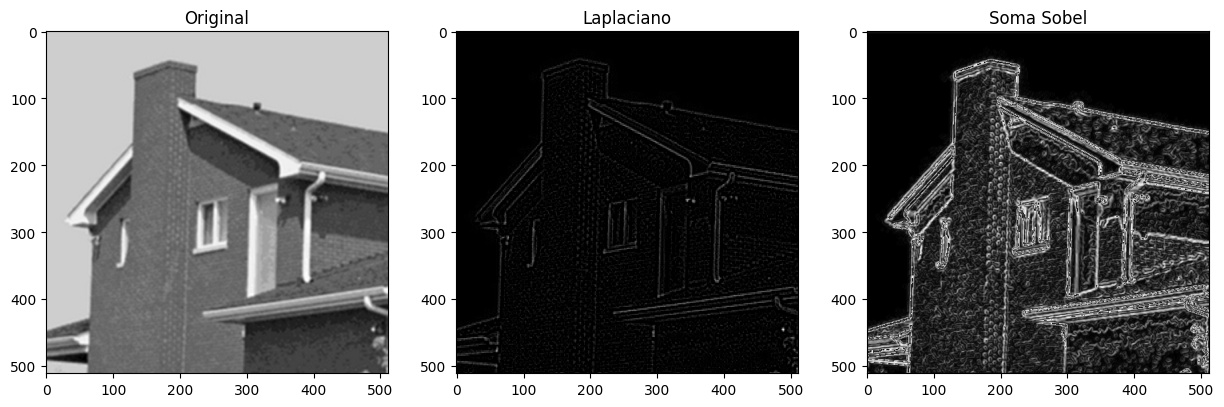

In [41]:
## -- Seu código começa AQUI -- ##
# Lendo a imagem e mostrando
img12 = cv.imread('house.tif', cv.IMREAD_UNCHANGED)
plt.imshow(img12, cmap='gray')
plt.show()


# Aplicando os filtros Sobel
img12_s = []
img12_sbin = []
th_bin = [90, 100, 85, 85, 75, 80]
for i in range(len(sobel)):
    k_s = sobel[i]
    img = cv.filter2D(src=img12, kernel=k_s, ddepth=-1)
    img12_s.append(img)
    th, img_bin = cv.threshold(img, th_bin[i], 255, cv.THRESH_BINARY)
    img12_sbin.append(img_bin)

# Somando as imagens binarizadas
sobel_sum = 0
for img in img12_s:
    sobel_sum = sobel_sum + img

# Mostrando o resultado da filtragem com os kernels Sobel
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
plt.title('Sobel 1')
plt.imshow(img12_sbin[0], cmap='gray')

plt.subplot(2,3,2)
plt.title('Sobel 2')
plt.imshow(img12_sbin[1], cmap='gray')

plt.subplot(2,3,3)
plt.title('Sobel 3')
plt.imshow(img12_sbin[2], cmap='gray')

plt.subplot(2,3,4)
plt.title('Sobel 4')
plt.imshow(img12_sbin[3], cmap='gray')

plt.subplot(2,3,5)
plt.title('Sobel 5')
plt.imshow(img12_sbin[4], cmap='gray')

plt.subplot(2,3,6)
plt.title('Sobel 6')
plt.imshow(img12_sbin[5], cmap='gray')
plt.show()

# Aplicando o filtro Laplaciano
img12_l = cv.filter2D(src=img12, kernel=laplaciano, ddepth=-1)

# Mostrando os resultados
plt.figure(figsize = (15,30))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img12, cmap='gray')

plt.subplot(1,3,2)
plt.title('Laplaciano')
plt.imshow(img12_l, cmap='gray')

plt.subplot(1,3,3)
plt.title('Soma Sobel')
plt.imshow(sobel_sum, cmap='gray')
plt.show()
## -- Seu código termina AQUI -- ##

<h2> Comentário
<h5>
Percebe-se que o resultado da soma dos filtros sobel é ligeiramente parecido com o de um filtro laplaciano, já que o segundo é isotrópico. Como há a soma de várias componentes, o nível de cinza é consideravelemtne maior no filtro da soma, mas mostra características similares do laplaciano.

In [ ]:
# DICA: você pode usar um espaço como este para simular os melhores thresholds para cada kernel.

#@title Teste Threshold{ run: "auto" }

Threshold = 197 #@param {type:"slider", min:0, max:255, step:1}

## -- Seu código começa AQUI -- ##

## -- Seu código termina AQUI -- ##

## 2) Influência da iluminação na segmentação (Nota 2.0/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora_.png" width="256" height="256"></center>

<center><caption><b> Figura 1:</b> Imagem abobora.tif.</b></caption></center>

1. Utilize o método de Otsu para binarizar a imagem `abobora.tif`.
2. Divida a imagem em 8, 32 e 256 sub-imagens, aplique o método de Otsu em cada uma delas e remonte a imagem final (Tenha em mente que a divisão deve ser feita de forma a segmentar em sub-regiões com o máximo de características semelhantes, de forma a se aproveitar da melhor forma o método utilizado).
3. Apresente a imagem original , e dos resultados dos itens 1 e 2 em um subplot. Coloque título em cada plot.
4. Comente os resultados obtidos.

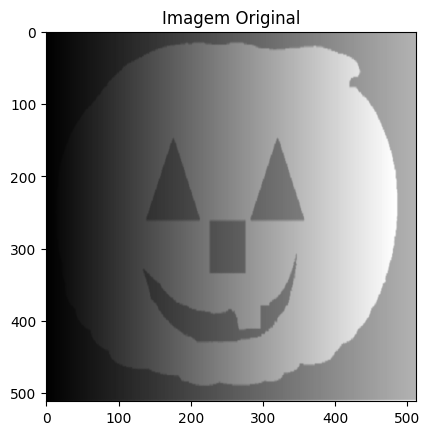

[]

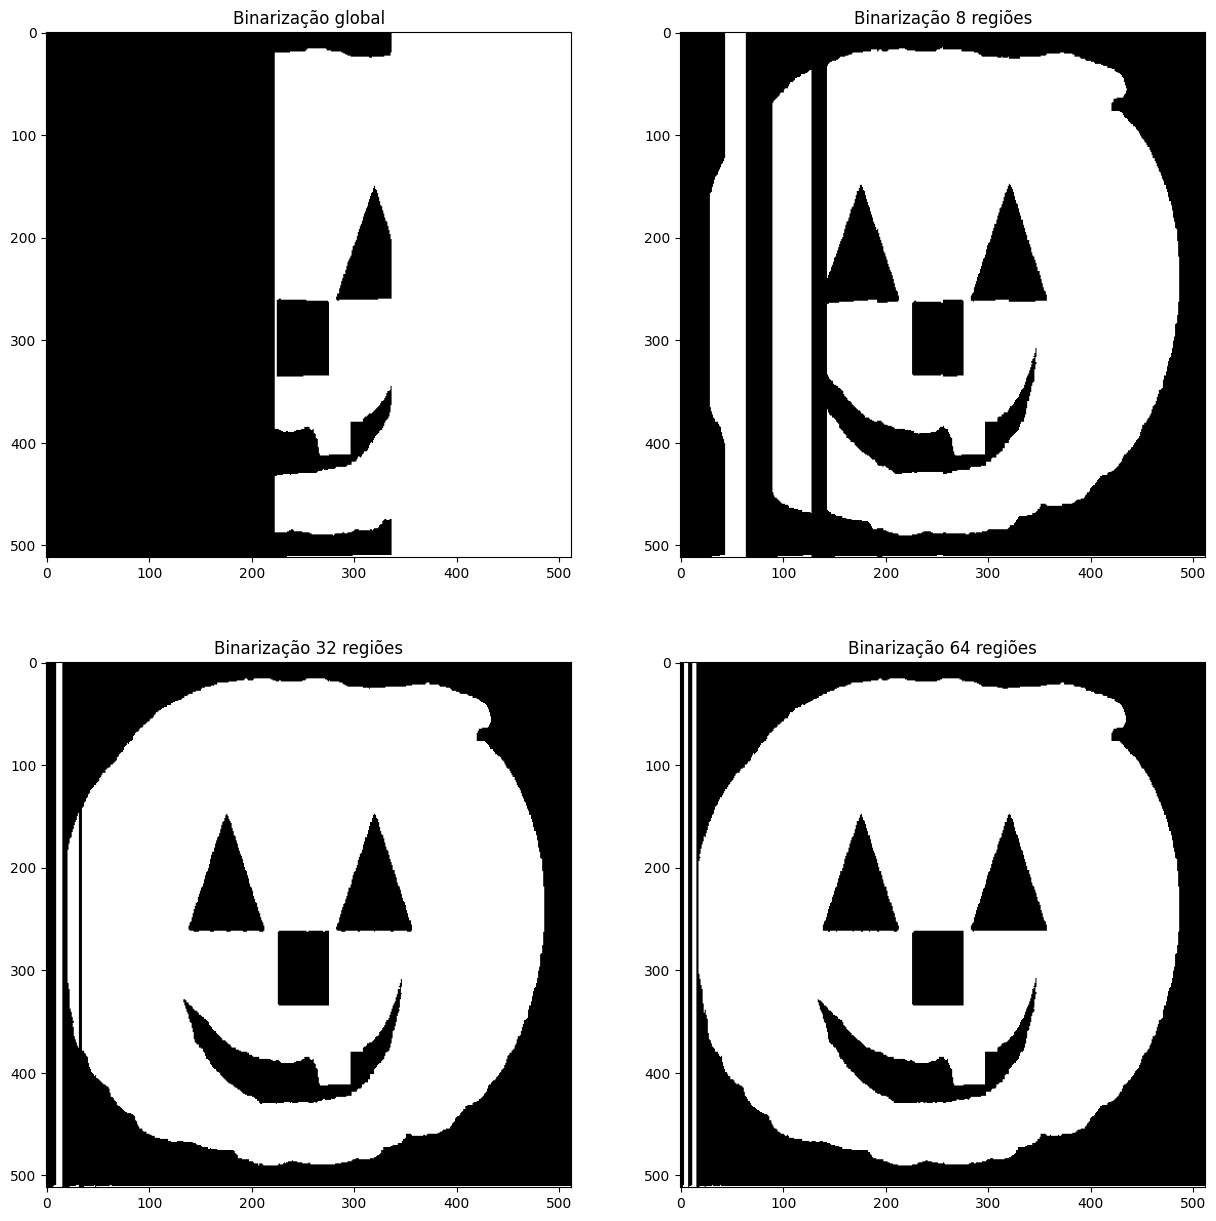

In [27]:
## -- Seu código começa AQUI -- ##
# Carregando a imagem
img2 = cv.imread('abobora.tif', cv.IMREAD_UNCHANGED)

plt.title('Imagem Original')
plt.imshow(img2, cmap='gray')
plt.show()

# Realizando a binarização pelo método de Otsu
th, img2_bin = cv.threshold(img2, 150, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

# Dividindo a imagem
m,n = img2.shape

img2_8 = np.zeros((m,n))
k_8 = n/8
for i in range(8):
    img_new = img2[:,int(k_8*i):int(k_8*(i+1))]
    th, img_new = cv.threshold(img_new, 150, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    img2_8[:,int(k_8*i):int(k_8*(i+1))] = img_new


img2_32 = np.zeros((m,n))
k_32 = n/32
for i in range(32):
    img_new = img2[:,int(k_32*i):int(k_32*(i+1))]
    th, img_new = cv.threshold(img_new, 150, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    img2_32[:,int(k_32*i):int(k_32*(i+1))] = img_new


img2_64 = np.zeros((m,n))
k_64 = n/64
for i in range(64):
    img_new = img2[:,int(k_64*i):int(k_64*(i+1))]
    th, img_new = cv.threshold(img_new, 150, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    img2_64[:,int(k_64*i):int(k_64*(i+1))] = img_new


# Mostrando os resultados
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Binarização global')
plt.imshow(img2_bin, cmap='gray')

plt.subplot(2,2,2)
plt.title('Binarização 8 regiões')
plt.imshow(img2_8, cmap='gray')

plt.subplot(2,2,3)
plt.title('Binarização 32 regiões')
plt.imshow(img2_32, cmap='gray')

plt.subplot(2,2,4)
plt.title('Binarização 64 regiões')
plt.imshow(img2_64, cmap='gray')
plt.plot()

## -- Seu código termina AQUI -- ##

<h2>Comentário
<h5>
A binarização global falha em separar as regiões de maneira correta, pois a diferença de luminosidade faz com que áreas de fundo e de frente tenham níveis de luminosidade similar. Dividindo a imagem em sub-regiões que possuem ilumiação semelhante, o resultado se torna um pouco melhor, já que o brilho de toda a região será semelhante. Percebe-se que, quando menor a região subdividida, melhor é a binarização, com excessão do extremo à esquerda, pois a iluminação é muito baixa e a separação se torna muito difícil. 

## 3) Limiarização local (Nota 1.5/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku_.png" width="256" height="156"></center>

<center><caption><b> Figura 2:</b> Imagem sudoku.tif.</b></caption></center>

1. A imagem `sudoku.tif` possui uma iluminação não uniforme. Aplique a binarização pelo método de limiarização local nessa imagem variando os parâmetros `blockSize` (tamanho da janela) e `C` (constante a ser diminuída da média) de forma a se obter um resultado satisfatório.

2. Aplique a binarização pelo método de Otsu e compare com o resultado obtido no item 1.

**Dicas:**

* A limiarização local pode ser feita pela função [cv.adaptiveThreshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3). Utilize o método adaptativo `cv.ADAPTIVE_THRESH_MEAN_C` que calcula o limiar como sendo a média de uma vizinhança `blockSize x blockSize` subtraída de uma constante `C`.

``` python
# Limiarização local pela média
th3 = cv.adaptiveThreshold(img,maxVal,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)
```

[]

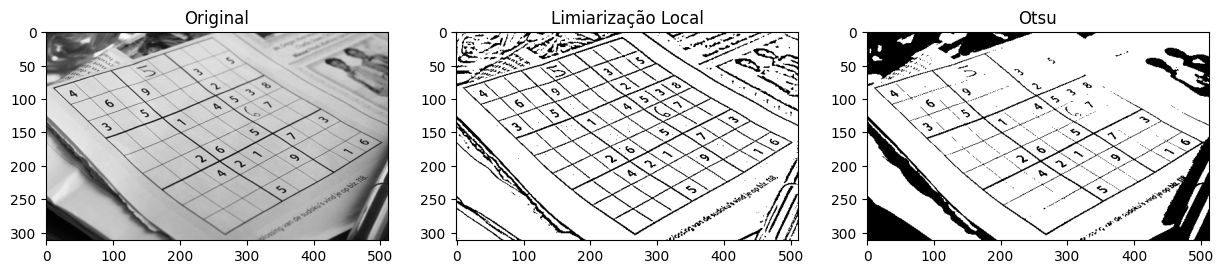

In [40]:
## -- Seu código começa AQUI -- ##
# Carregando a imagem
img3 = cv.imread('sudoku.tif', cv.IMREAD_UNCHANGED)

# Fazendo a binarização local
img3_local = cv.adaptiveThreshold(img3, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=7, C=7)

# Fazendo a binarização Otsu
th, img3_bin = cv.threshold(img3, 150, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

# Mostrando os resultados
plt.figure(figsize=(15,30))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img3, cmap='gray')

plt.subplot(1,3,2)
plt.title('Limiarização Local')
plt.imshow(img3_local, cmap='gray')

plt.subplot(1,3,3)
plt.title('Otsu')
plt.imshow(img3_bin, cmap='gray')
plt.plot()
## -- Seu código termina AQUI -- ##

## 4) K-means (Nota 3.5/10)

Neste exercício, queremos isolar os cartões coloridos da imagem `cores.jpeg`.

1. Leia e plote a imagem `cores.jpeg`.
2. Converta a imagem lida no item 1 para o espaço de cores para HSV.
3. Aplique o algoritmo de K-means no canal MATIZ. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
4. Aplique o algoritmo de K-means no canal SATURAÇÃO. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
5. Transforme as imagens resultantes dos itens 3 e 4 em máscaras para isolar os cartões destacados. Ou seja, analise um valor de threshold que transforma as imagens em imagens binárias. Mostre as máscaras obtidas.
6. Faça uma operação de OR entre as duas máscaras obtidas para obter uma máscara final. Mostre esta máscara.
7. Transforme a imagem `cores.jpeg`. para o espaço de cores RGB. Aplique a máscara obtida em 6 nesta imagem. Queremos que o fundo fique preto e apenas os cartões coloridos sejam mostrados na imagem.

**Dicas:**

* Você pode utilizar a função [cv.kmeans](https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88) para a segmentação. Você pode utilizar 20 iterações e epsilon = 0.01 para o K-means.

* Para utilizar o K-means você deve passar a imagem como um vetor (1D). O método `.ravel()` e `.flatten()` fazem isso. Além disso, a imagem deve estar em `float32`.

* Para retornar a imagem resultante do k-means para o shape original, você pode utilizar a função `img_res.reshape(shape original)`.

``` python
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(myVector, nCluster(k), None, criterio, 5, cv.KMEANS_PP_CENTERS)

```

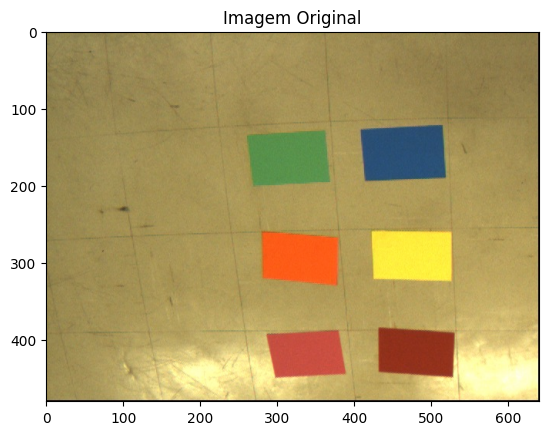

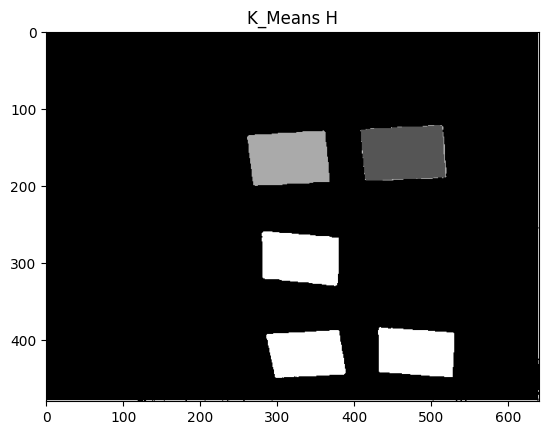

O valor máximo do kNN no canal H foi 3 e o mínimo foi 0


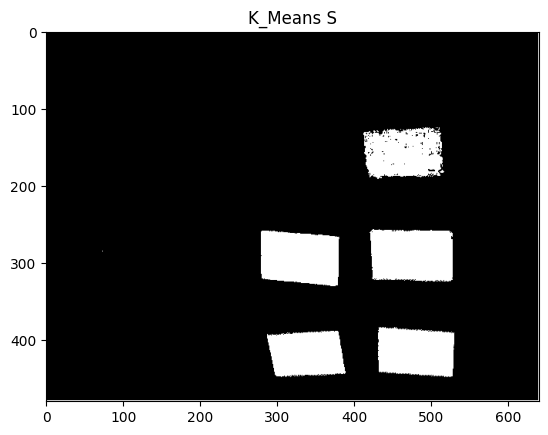

O valor máximo do kNN no canal H foi 1 e o mínimo foi 0


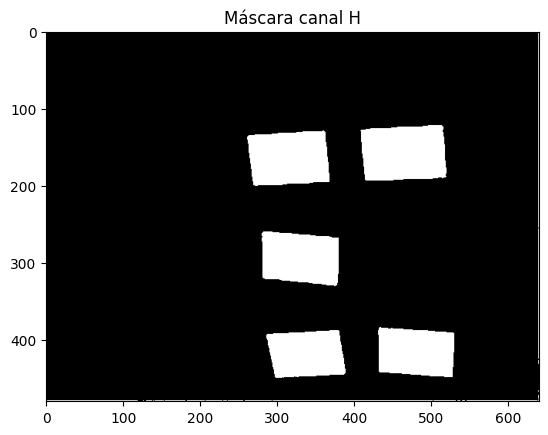

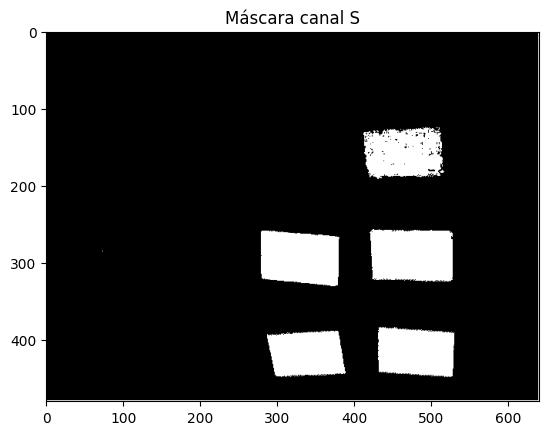

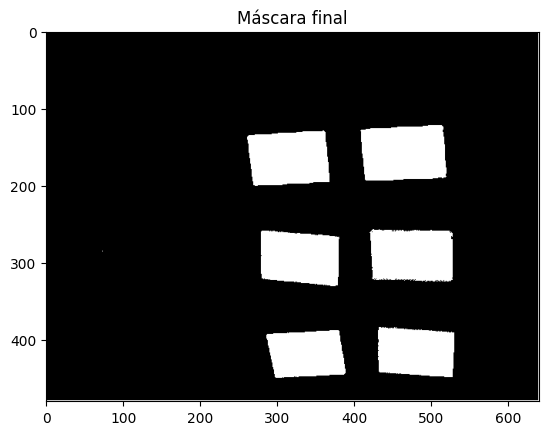

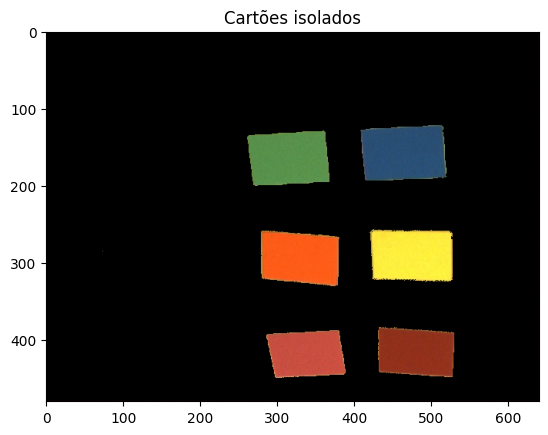

In [22]:
## -- Seu código começa AQUI -- ##
#1.
# Lendo a imagem
img4 = cv.imread('cores.jpeg', cv.IMREAD_COLOR)
img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

# Mostrando a imagem original (RGB)
plt.title('Imagem Original')
plt.imshow(img4_rgb)
plt.show()

#2.
# Convertendo a imagem para HSV
img4_hsv = cv.cvtColor(img4_rgb, cv.COLOR_RGB2HSV)

#3.
# Extraindo e convertendo o canal H
channel_h = img4_hsv[:,:,0].flatten()
channel_h = channel_h.flatten().astype(np.float32)

# Aplicando o k-means
crit = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.01)
ret,label,centers = cv.kmeans(channel_h, 4, None, crit, 5, cv.KMEANS_PP_CENTERS)

# Mostrando o resultado
kmeans_h = label.reshape(img4_hsv[:,:,0].shape).astype(np.uint8)

plt.title('K_Means H')
plt.imshow(kmeans_h, cmap='gray')
plt.show()

# Mostrando o mínimo e o máximo
max_h = np.max(kmeans_h)
min_h = np.min(kmeans_h)
print(f'O valor máximo do kNN no canal H foi {max_h} e o mínimo foi {min_h}')

#4.
# Extraindo e convertendo o canal S
channel_s = img4_hsv[:,:,1]
channel_s = channel_s.flatten().astype(np.float32)

# Aplicando o k-means
crit = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.01)
ret,label,centers = cv.kmeans(channel_s, 2, None, crit, 5, cv.KMEANS_PP_CENTERS)

# Mostrando o resultado
kmeans_s = label.reshape(img4_hsv[:,:,1].shape).astype(np.uint8)

plt.title('K_Means S')
plt.imshow(kmeans_s, cmap='gray')
plt.show()

# Mostrando o mínimo e o máximo
max_s = np.max(kmeans_s)
min_s = np.min(kmeans_s)
print(f'O valor máximo do kNN no canal H foi {max_s} e o mínimo foi {min_s}')

#5.

# Binarizando a imagem do canal H
th, mask_h = cv.threshold(kmeans_h, 0.5, 255, cv.THRESH_BINARY)

# Mostrando a máscara H
plt.title('Máscara canal H')
plt.imshow(mask_h, cmap='gray')
plt.show()

# Binarizando a imagem do canal S
th, mask_s = cv.threshold(kmeans_s, 0.5, 255, cv.THRESH_BINARY)

# Mostrando a máscara H
plt.title('Máscara canal S')
plt.imshow(mask_s, cmap='gray')
plt.show()

#6.

# Juntando as duas máscaras
mask = np.logical_or(mask_h, mask_s)

# Mostrando a máscara final
plt.title('Máscara final')
plt.imshow(mask, cmap='gray')
plt.show()

#7.

# Aplicando a máscara final na imagem RGB
img4_rgb[np.logical_not(mask)] = [0, 0, 0]

# Mostrando o resultado
plt.title('Cartões isolados')
plt.imshow(img4_rgb)
plt.show()

## -- Seu código termina AQUI -- ##

<h2> Comentário

<h5>O algoritimo KNN no canal de matiz não foi capaz de encontrar todos os cartões, faltando apenas um deles. Quando o algoritmo foi aplicado no canal de saturação, ele também não encontrou todos os cartões, mas conseguiu encontrar aquele que tinha sido deixado de fora no canal H.

